# <font color="purple">IRIS dataset </font>
***

### Summary of IRIS dataset:
***

The IRIS dataset, created in 1936, is a popular dataset commonly used for exploring data analysis and data visualisation.

The dataset consists of measurements for 3 different species (setosa, versicolor and virginica) of Iris flowers.  
There are 50 entries per species detailed in the dataset.

#### Species:
|Setosa    |Versicolor | Virginica|
|-----------|---------------|------------|
|![Setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)|![Versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/320px-Iris_versicolor_3.jpg)|![Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg)|

As the species variable are plain text, the data type string will be applicable here.

Four characteristics of the flowers were tracked including sepal length (cm), sepal width (cm), petal length (cm) and petal width (cm).  
These four varaibles are numeric values and looking at the raw data we can see decimal places are present. 
With this, the data type used for this variables will be float.

 

### How to run analysis.py program:
***

### analysis.py code explained: 
***
> enumerate() - Works as a way to loop over objects while also keeping count for the loop.
The added bonus in this case is that it has the possibility to work with dictionaries key-pairs when used with the items() method. 
The enumerate function can take in two arguments the sequence to be used for the loop and optionally the starting value for the loop. If the starting value is not defined it defaults to 0.  
Using indexing enumerate adds the possibility to access key-pair information from a dictionary, this makes it possible to change values in the loop after each iteration.   
In the case of analysis.py file it allows for the variable used to plot the histogram and the filename of the png to be updated after each iteration resulting in much neater code.  

https://www.simplilearn.com/tutorials/python-tutorial/enumerate-in-python
https://www.freecodecamp.org/news/how-to-check-if-a-file-exists-in-python/  
https://www.geeksforgeeks.org/python-check-if-a-file-or-directory-exists/

> items() - Returns a view option that contains key-pair values in from a dictionary.   
For this project it is pulling the variable and png filename to be used with the enumerate function for  the loop. 

https://www.w3schools.com/python/ref_dictionary_items.asp
https://www.geeksforgeeks.org/python-dictionary-items-method/
https://docs.python.org/3/library/stdtypes.html#dictionary-view-objects



### Creating summary file
***

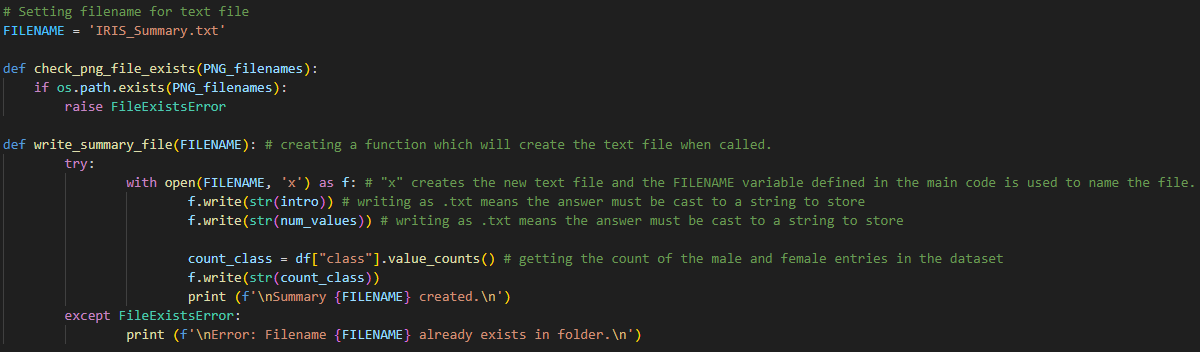

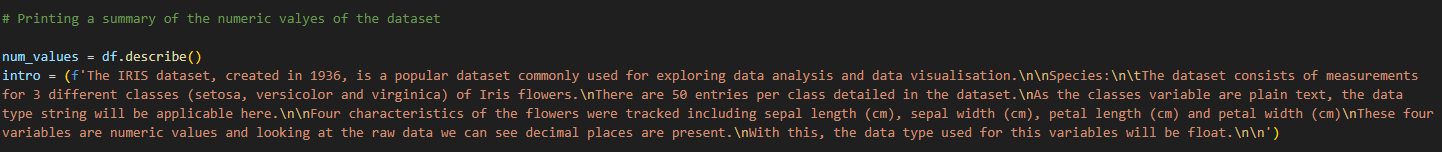


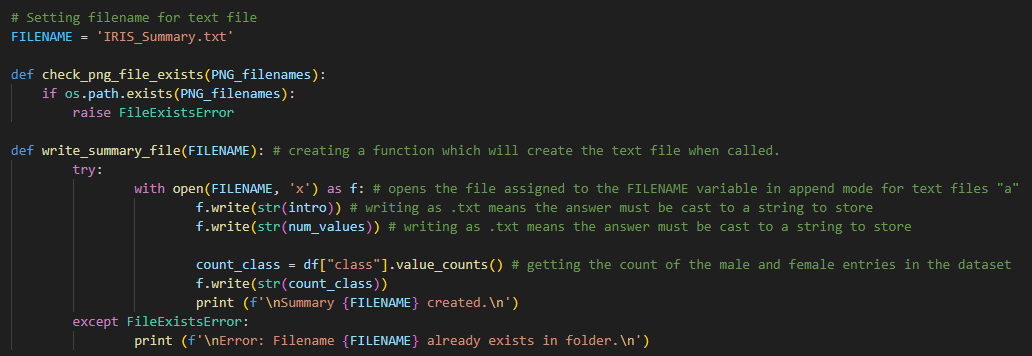

### Creating Histograms
***

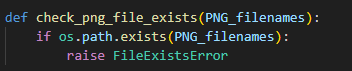

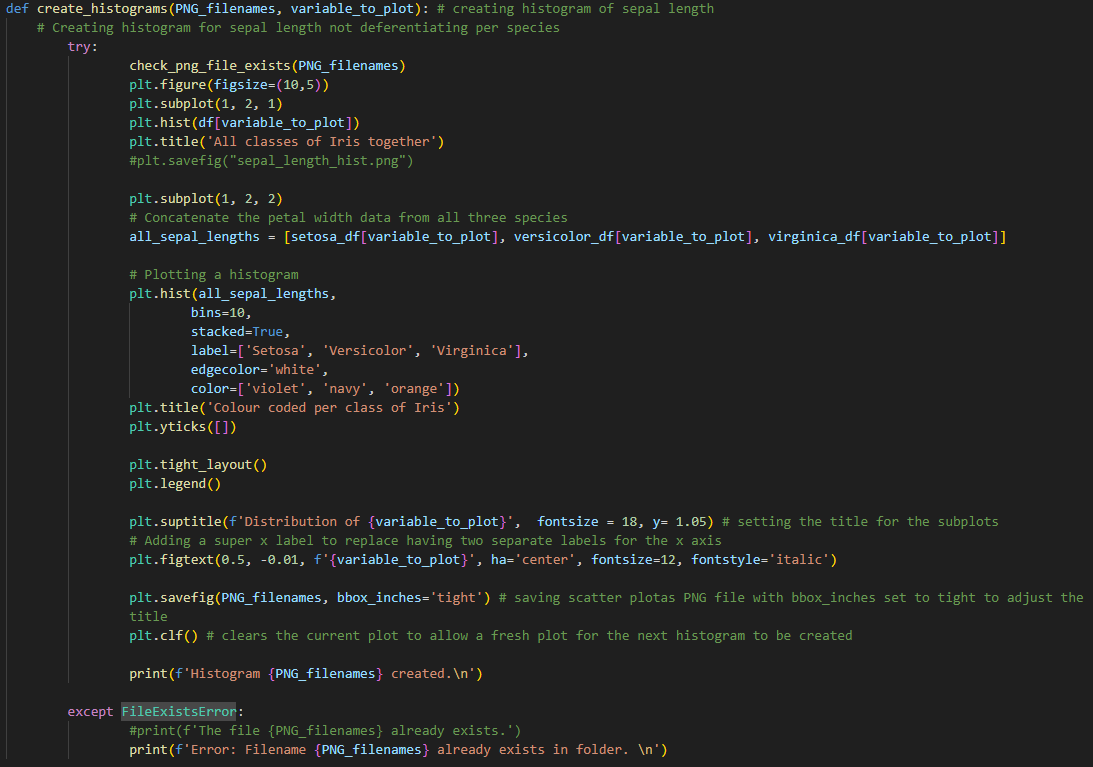

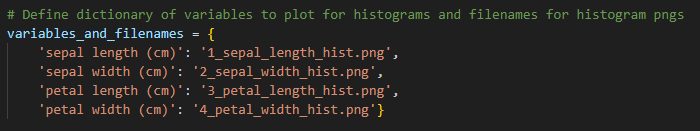

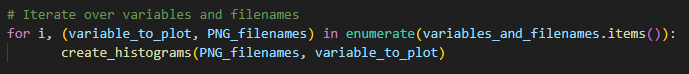

Creating the scatter plot
***

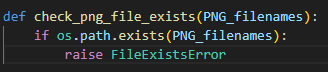

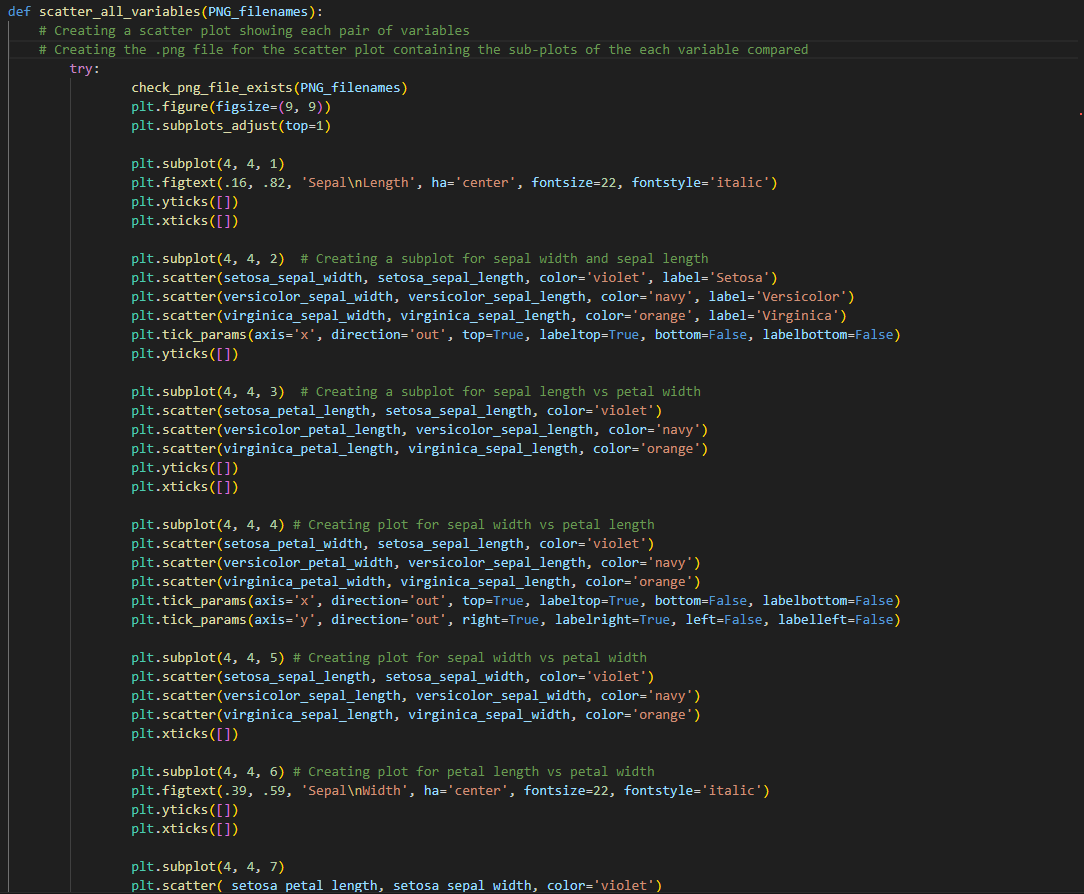

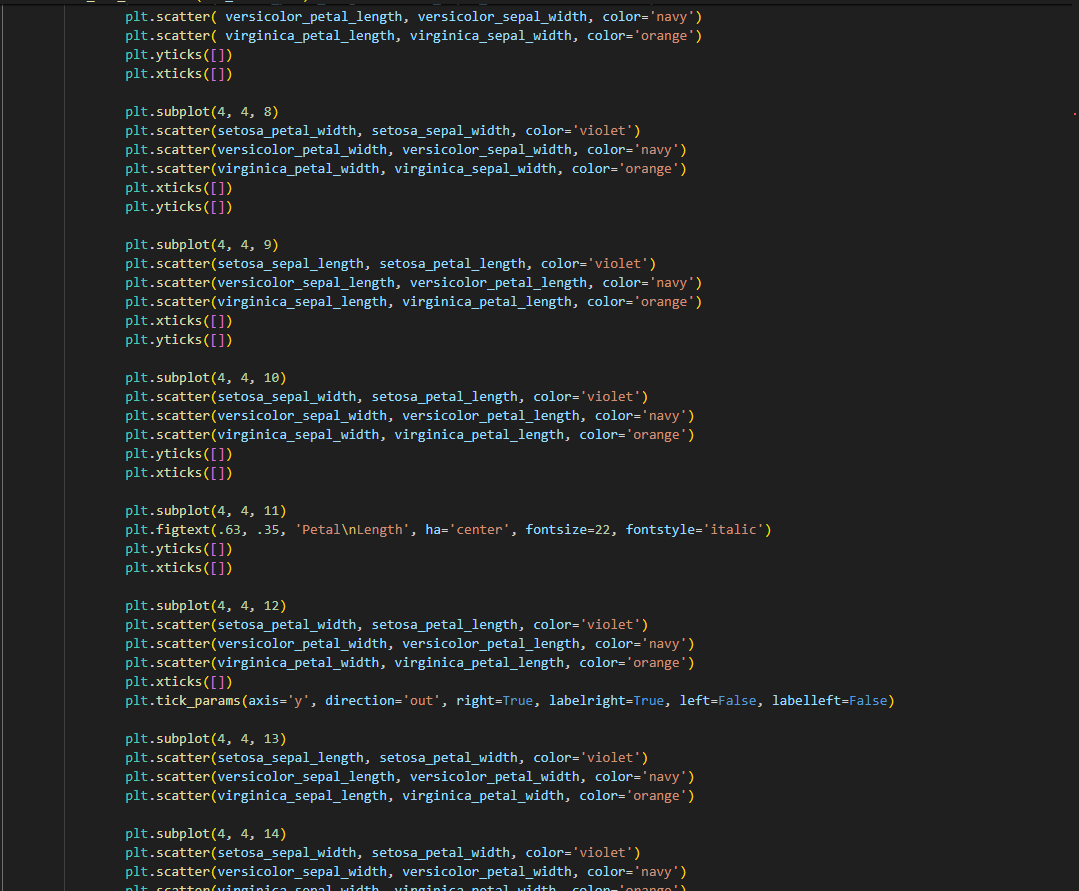

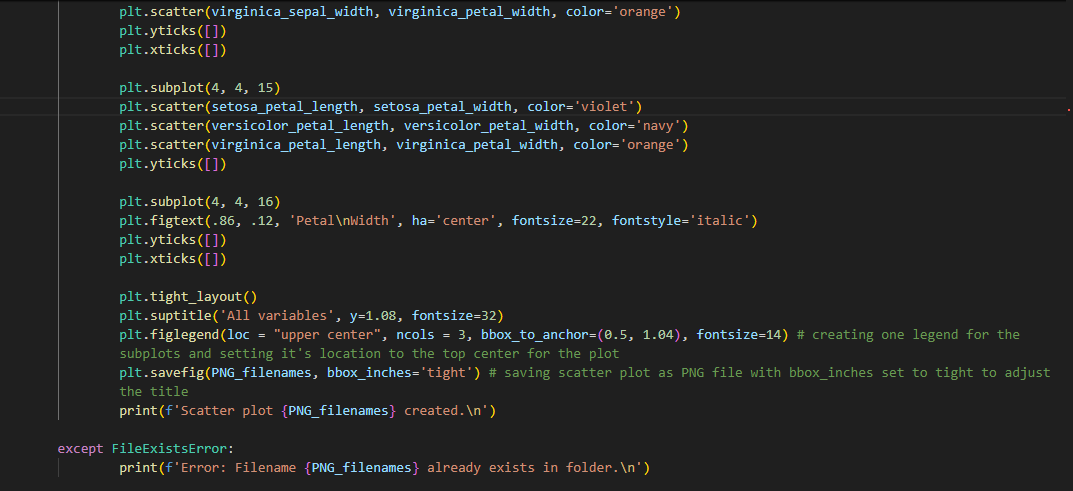

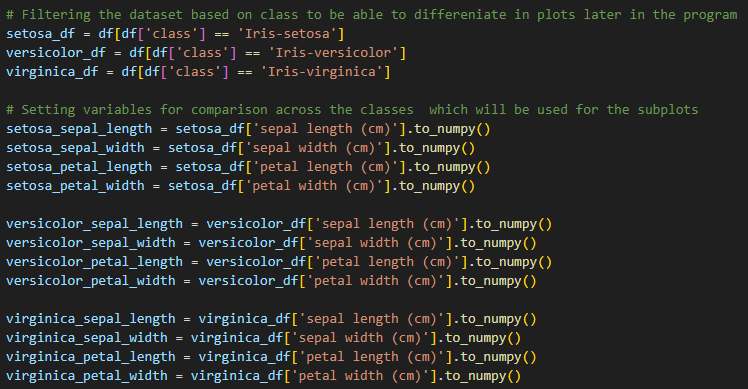

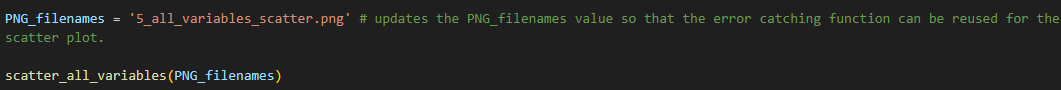

#### Libaries used:
***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Creating functions to reuse later:

In [ ]:
def setting_axis_limits(ymin, ymax): # function to overwrite the range automatically populated for plots and instead use set values for ranges for the x and y axis 
    plt.ylim(ymin, ymax) # setting min and max values for the y axis 
    #plt.xlim(xmin, xmax) # setting the min and max values for the y axis

In [ ]:
def check_png_file_exists(PNG_filenames):
    if os.path.exists(PNG_filenames):
        raise FileExistsError

In [ ]:
def write_summary_file(FILENAME): # creating a function which will create the text file when called.
        try:
                with open(FILENAME, 'x') as f: # opens the file assigned to the FILENAME variable in append mode for text files "a"
                        f.write(str(intro)) # writing as .txt means the answer must be cast to a string to store
                        f.write(str(num_values)) # writing as .txt means the answer must be cast to a string to store
                        
                        count_class = df["class"].value_counts() # getting the count of the male and female entries in the dataset
                        f.write(str(count_class))
                        print (f'\nSummary {FILENAME} created.\n')
        except FileExistsError:
                print (f'\nError: Filename {FILENAME} already exists in folder.\n')

In [ ]:
def create_histograms(PNG_filenames, variable_to_plot): # creating histogram of sepal length
    # Creating histogram for sepal length not deferentiating per species
        try: 
                check_png_file_exists(PNG_filenames)
                plt.figure(figsize=(10,5))
                plt.subplot(1, 2, 1)
                plt.hist(df[variable_to_plot])
                plt.title('All classes of Iris together')
                #plt.savefig("sepal_length_hist.png")

                plt.subplot(1, 2, 2)
                # Concatenate the petal width data from all three species
                all_sepal_lengths = [setosa_df[variable_to_plot], versicolor_df[variable_to_plot], virginica_df[variable_to_plot]]

                # Plotting a histogram
                plt.hist(all_sepal_lengths,
                        bins=10,
                        stacked=True,
                        label=['Setosa', 'Versicolor', 'Virginica'],
                        edgecolor='white',
                        color=['violet', 'navy', 'orange'])
                plt.title('Colour coded per class of Iris')
                plt.yticks([])

                plt.tight_layout()
                plt.legend()

                plt.suptitle(f'Distribution of {variable_to_plot}',  fontsize = 18, y= 1.05) # setting the title for the subplots
                # Adding a super x label to replace having two separate labels for the x axis
                plt.figtext(0.5, -0.01, f'{variable_to_plot}', ha='center', fontsize=12, fontstyle='italic')

                plt.savefig(PNG_filenames, bbox_inches='tight') # saving scatter plotas PNG file with bbox_inches set to tight to adjust the title
                plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

                print(f'Histogram {PNG_filenames} created.\n')

        except FileExistsError:
                #print(f'The file {PNG_filenames} already exists.')
                print(f'Error: Filename {PNG_filenames} already exists in folder. \n')

In [ ]:
def scatter_all_variables(PNG_filenames):
    # Creating a scatter plot showing each pair of variables 
    # Creating the .png file for the scatter plot containing the sub-plots of the each variable compared 
    # Setting variables for comparison across the species which will be used for the subplots
    # sepal length vs sepal width, sepal length vs petal length, sepal length vs petal width
    # sepal width vs petal length, sepal width vs petal width
    # petal length vs petal width
    # petal width
    # Setting variables for comparison across the species which will be used for the subplots
    # sepal length vs sepal width, sepal length vs petal length, sepal length vs petal width
    # sepal width vs petal length, sepal width vs petal width
    # petal length vs petal width
    # petal width
        try: 
                check_png_file_exists(PNG_filenames)
                plt.figure(figsize=(9, 9))
                plt.subplots_adjust(top=1)

                plt.subplot(4, 4, 1) 
                plt.figtext(.16, .82, 'Sepal\nLength', ha='center', fontsize=22, fontstyle='italic')
                plt.yticks([])
                plt.xticks([])

                plt.subplot(4, 4, 2)  # Creating a subplot for sepal width and sepal length
                plt.scatter(setosa_sepal_width, setosa_sepal_length, color='violet', label='Setosa')
                plt.scatter(versicolor_sepal_width, versicolor_sepal_length, color='navy', label='Versicolor')
                plt.scatter(virginica_sepal_width, virginica_sepal_length, color='orange', label='Virginica')
                plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
                plt.yticks([])

                plt.subplot(4, 4, 3)  # Creating a subplot for sepal length vs petal width
                plt.scatter(setosa_petal_length, setosa_sepal_length, color='violet')
                plt.scatter(versicolor_petal_length, versicolor_sepal_length, color='navy')
                plt.scatter(virginica_petal_length, virginica_sepal_length, color='orange')
                plt.yticks([])
                plt.xticks([])

                plt.subplot(4, 4, 4) # Creating plot for sepal width vs petal length
                plt.scatter(setosa_petal_width, setosa_sepal_length, color='violet')
                plt.scatter(versicolor_petal_width, versicolor_sepal_length, color='navy')
                plt.scatter(virginica_petal_width, virginica_sepal_length, color='orange')
                plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
                plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

                plt.subplot(4, 4, 5) # Creating plot for sepal width vs petal width
                plt.scatter(setosa_sepal_length, setosa_sepal_width, color='violet')
                plt.scatter(versicolor_sepal_length, versicolor_sepal_width, color='navy')
                plt.scatter(virginica_sepal_length, virginica_sepal_width, color='orange')
                plt.xticks([])

                plt.subplot(4, 4, 6) # Creating plot for petal length vs petal width
                plt.figtext(.39, .59, 'Sepal\nWidth', ha='center', fontsize=22, fontstyle='italic')
                plt.yticks([])
                plt.xticks([])

                plt.subplot(4, 4, 7)
                plt.scatter( setosa_petal_length, setosa_sepal_width, color='violet')
                plt.scatter( versicolor_petal_length, versicolor_sepal_width, color='navy')
                plt.scatter( virginica_petal_length, virginica_sepal_width, color='orange')
                plt.yticks([])
                plt.xticks([])

                plt.subplot(4, 4, 8)
                plt.scatter(setosa_petal_width, setosa_sepal_width, color='violet')
                plt.scatter(versicolor_petal_width, versicolor_sepal_width, color='navy')
                plt.scatter(virginica_petal_width, virginica_sepal_width, color='orange')
                plt.xticks([])
                plt.yticks([])

                plt.subplot(4, 4, 9)
                plt.scatter(setosa_sepal_length, setosa_petal_length, color='violet')
                plt.scatter(versicolor_sepal_length, versicolor_petal_length, color='navy')
                plt.scatter(virginica_sepal_length, virginica_petal_length, color='orange')
                plt.xticks([])
                plt.yticks([])

                plt.subplot(4, 4, 10)
                plt.scatter(setosa_sepal_width, setosa_petal_length, color='violet')
                plt.scatter(versicolor_sepal_width, versicolor_petal_length, color='navy')
                plt.scatter(virginica_sepal_width, virginica_petal_length, color='orange')
                plt.yticks([])
                plt.xticks([])

                plt.subplot(4, 4, 11)
                plt.figtext(.63, .35, 'Petal\nLength', ha='center', fontsize=22, fontstyle='italic')
                plt.yticks([])
                plt.xticks([])

                plt.subplot(4, 4, 12)
                plt.scatter(setosa_petal_width, setosa_petal_length, color='violet')
                plt.scatter(versicolor_petal_width, versicolor_petal_length, color='navy')
                plt.scatter(virginica_petal_width, virginica_petal_length, color='orange')
                plt.xticks([])
                plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

                plt.subplot(4, 4, 13)
                plt.scatter(setosa_sepal_length, setosa_petal_width, color='violet')
                plt.scatter(versicolor_sepal_length, versicolor_petal_width, color='navy')
                plt.scatter(virginica_sepal_length, virginica_petal_width, color='orange')

                plt.subplot(4, 4, 14)
                plt.scatter(setosa_sepal_width, setosa_petal_width, color='violet')
                plt.scatter(versicolor_sepal_width, versicolor_petal_width, color='navy')
                plt.scatter(virginica_sepal_width, virginica_petal_width, color='orange')
                plt.yticks([])
                plt.xticks([])

                plt.subplot(4, 4, 15)
                plt.scatter(setosa_petal_length, setosa_petal_width, color='violet')
                plt.scatter(versicolor_petal_length, versicolor_petal_width, color='navy')
                plt.scatter(virginica_petal_length, virginica_petal_width, color='orange')
                plt.yticks([])

                plt.subplot(4, 4, 16) 
                plt.figtext(.86, .12, 'Petal\nWidth', ha='center', fontsize=22, fontstyle='italic')
                plt.yticks([])
                plt.xticks([])

                plt.tight_layout()
                plt.suptitle('All variables', y=1.08, fontsize=32)
                plt.figlegend(loc = "upper center", ncols = 3, bbox_to_anchor=(0.5, 1.04), fontsize=14) # creating one legend for the subplots and setting it's location to the top center for the plot
                plt.savefig(PNG_filenames, bbox_inches='tight') # saving scatter plot as PNG file with bbox_inches set to tight to adjust the title
                print(f'Scatter plot {PNG_filenames} created.\n')
        
        except FileExistsError:
                print(f'Error: Filename {PNG_filenames} already exists in folder.\n')

In [ ]:
def set_bins_width(histogram_to_plot):
        # Compute the bin edges based on the overall range of petal widths
        min_width = min(setosa_df[histogram_to_plot].min(), versicolor_df[histogram_to_plot].min(), virginica_df[histogram_to_plot].min())
        max_width = max(setosa_df[histogram_to_plot].max(), versicolor_df[histogram_to_plot].max(), virginica_df[histogram_to_plot].max())
        bin_edges = np.linspace(min_width, max_width, 11)  # 10 bins with equal width
        return bin_edges

In [ ]:
# fetching data from csv file
df = pd.read_csv('iris_data.csv')

In [ ]:
# Filter the dataset based on species to be able to seperate and compare the variables and differientate per species
# setosa, versicolor and virginica

setosa_df = df[df['class'] == 'Iris-setosa']
versicolor_df = df[df['class'] == 'Iris-versicolor']
virginica_df = df[df['class'] == 'Iris-virginica']


In [ ]:
# taking a quick look at the data to verify it's loaded
print (df)

In [ ]:
# Show the different types of values in the data set
df.dtypes

In [ ]:
# Highlevel summary of dataset for the numerical columns 
df.describe()

In [ ]:
count_class = df["class"].value_counts() # getting the count of the male and female entries in the dataset
print(count_class) # printing the counts

In [ ]:
# Trying the error handling for text file

# Approach1: Try to open file, if it opens then response is passed back to user to say file already exists, if FileNotFoundError is returned the code runs
# Tested and works but would it make more sense to do it differently? i.e first try to create new file with filename and then if error is thrown for file already existing to thrown the error back?
# Setting filename for text file
FILENAME = 'IRIS_Summary.txt'

num_values = df.describe()
intro = (f'The IRIS dataset, created in 1936, is a popular dataset commonly used for exploring data analysis and data visualisation.\n\nSpecies:\n\tThe dataset consists of measurements for 3 different classes (setosa, versicolor and virginica) of Iris flowers.\nThere are 50 entries per class detailed in the dataset.\nAs the classes variable are plain text, the data type string will be applicable here.\n\nFour characteristics of the flowers were tracked including sepal length (cm), sepal width (cm), petal length (cm) and petal width (cm)\nThese four variables are numeric values and looking at the raw data we can see decimal places are present.\nWith this, the data type used for this variables will be float.\n\n')


def write_summary_file(): # creating a function which will create the text file when called.
    with open(FILENAME, 'a') as f: # opens the file assigned to the FILENAME variable in append mode for text files "a"
        f.write(str(intro)) # writing as .txt means the answer must be cast to a string to store
        f.write(str(num_values)) # writing as .txt means the answer must be cast to a string to store
        
        count_class = df["class"].value_counts() # getting the count of the male and female entries in the dataset
        f.write(str(count_class))

try:
    with open(FILENAME) as f: # file is first attemped to be opened as "f"
        print (f'Filenames already existing in folder, no new files generated.')

except FileNotFoundError:
    write_summary_file()

In [ ]:
# Trying the error handling for text file

# Approach2: Try to create new file with filename and then if error is thrown for file already existing to thrown the error back?
# Setting filename for text file
FILENAME = 'IRIS_Summary.txt'

num_values = df.describe()
intro = (f'The IRIS dataset, created in 1936, is a popular dataset commonly used for exploring data analysis and data visualisation.\n\nSpecies:\n\tThe dataset consists of measurements for 3 different classes (setosa, versicolor and virginica) of Iris flowers.\nThere are 50 entries per class detailed in the dataset.\nAs the classes variable are plain text, the data type string will be applicable here.\n\nFour characteristics of the flowers were tracked including sepal length (cm), sepal width (cm), petal length (cm) and petal width (cm)\nThese four variables are numeric values and looking at the raw data we can see decimal places are present.\nWith this, the data type used for this variables will be float.\n\n')


def write_summary_file(): # creating a function which will create the text file when called.
    with open(FILENAME, 'x') as f: # opens the file assigned to the FILENAME variable in append mode for text files "a"
        f.write(str(intro)) # writing as .txt means the answer must be cast to a string to store
        f.write(str(num_values)) # writing as .txt means the answer must be cast to a string to store
        
        count_class = df["class"].value_counts() # getting the count of the male and female entries in the dataset
        f.write(str(count_class))

try: 
    write_summary_file()

except FileExistsError: 
    print (f'\nError: Filename {FILENAME} already exists in folder. \nNo changes will be made to {FILENAME} and no new .txt file will be generated.\n')


## Historgrams:

Histogram is not unimodal or symetric. 3 peaks.

In [ ]:
# sepal width (cm)	

plt.hist(df["sepal width (cm)"])
plt.xlabel('Sepal width (cm)') # setting label for x axis 
plt.title("Distribution of sepal width") # setting plot title
#plt.savefig("sepal_width_hist.png")
plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

In [ ]:
# Concatenate the petal width data from all three species
all_sepal_widths = [setosa_df['sepal width (cm)'], versicolor_df['sepal width (cm)'], virginica_df['sepal width (cm)']]

# Plotting a histogram
plt.hist(all_sepal_widths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.title("Distribution of sepal width per species of Iris") # setting plot title
plt.legend()
plt.show() # showing the plot

plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

In [ ]:
# sepal width (cm)	

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(df["sepal width (cm)"], label= 'All\n types')
plt.xlabel('Sepal width (cm)') # setting label for x axis 
plt.title("Distribution of sepal width") # setting plot title
plt.legend()
#plt.savefig("sepal_length_hist.png")

plt.subplot(1, 2, 2)
# Concatenate the petal width data from all three species
all_sepal_widths = [setosa_df['sepal width (cm)'], versicolor_df['sepal width (cm)'], virginica_df['sepal width (cm)']]

# Plotting a histogram
plt.hist(all_sepal_widths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.yticks([])
plt.title("Distribution of sepal width per species of Iris") # setting plot title
plt.tight_layout()
plt.legend()
plt.show() # showing the plot

plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

In [ ]:
# petal length (cm)	

plt.hist(df["petal length (cm)"])
plt.xlabel('Petal length (cm)') # setting label for x axis 
plt.title("Distribution of petal length (cm)") # setting plot title
#plt.savefig("petal_length_hist.png")
plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

In [ ]:
# Plotting a histogram showing the distribution of petal width across the dataset showing the additional context depending on the species of Iris

# Concatenate the petal width data from all three species
all_petal_lengths = [setosa_df['petal length (cm)'], versicolor_df['petal length (cm)'], virginica_df['petal length (cm)']]

# Plotting a histogram
plt.hist(all_petal_lengths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.title("Distribution of petal length per species of Iris") # setting plot title
plt.legend()
plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

In [ ]:
# Compute the bin edges based on the overall range of petal widths
min_width = min(setosa_df['petal width (cm)'].min(), versicolor_df['petal width (cm)'].min(), virginica_df['petal width (cm)'].min())
max_width = max(setosa_df['petal width (cm)'].max(), versicolor_df['petal width (cm)'].max(), virginica_df['petal width (cm)'].max())
bin_edges = np.linspace(min_width, max_width, 11)  # 10 bins with equal width

# Plotting histograms for each species separately with overlapping bins
plt.hist(setosa_df['petal width (cm)'], bins=bin_edges, alpha=0.5, label='Setosa', color='violet', edgecolor='white')
plt.hist(versicolor_df['petal width (cm)'], bins=bin_edges, alpha=0.5, label='Versicolor', color='navy', edgecolor='white')
plt.hist(virginica_df['petal width (cm)'], bins=bin_edges, alpha=0.5, label='Virginica', color='orange', edgecolor='white')

# Adding labels and title
plt.title("Distribution of petal width per species of Iris")
plt.xlabel("Petal width (cm)")
plt.ylabel("Frequency")

# Adding legend
plt.legend()

# Showing the plot
plt.show()

# Clearing the plot
plt.clf()


In [ ]:
# petal length (cm)	
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(df["petal length (cm)"], label= 'All\n types')
plt.xlabel('Petal length (cm)') # setting label for x axis 
plt.title("Distribution of petal length (cm)") # setting plot title
plt.legend()
#plt.savefig("sepal_length_hist.png")

plt.subplot(1, 2, 2)
# Concatenate the petal width data from all three species
all_petal_lengths = [setosa_df['petal length (cm)'], versicolor_df['petal length (cm)'], virginica_df['petal length (cm)']]

# Plotting a histogram
plt.hist(all_petal_lengths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.yticks([])
plt.title("Distribution of petal length per species of Iris") # setting plot title
plt.tight_layout()
plt.legend()


In [ ]:
plt.figure(figsize=(10,5))

##plt.subplot(1, 3, 1)
# Plotting histograms for each species separately with overlapping bins
plt.hist(setosa_df['petal length (cm)'], bins=2, label='Setosa', color='violet', edgecolor='white')
#plt.hist(versicolor_df['petal width (cm)'], bins=bin_edges, alpha=0.5, label='Versicolor', color='navy', edgecolor='white')
#plt.hist(virginica_df['petal width (cm)'], bins=bin_edges, alpha=0.5, label='Virginica', color='orange', edgecolor='white')
#setting_axis_limits()

#plt.subplot(1, 3, 2)
#plt.hist(versicolor_df['petal width (cm)'], bins=10, label='Versicolor', color='navy', edgecolor='white')
#setting_axis_limits()

#plt.subplot(1, 3, 3)
#plt.hist(virginica_df['petal width (cm)'], bins=10, label='Virginica', color='orange', edgecolor='white')
#setting_axis_limits()

# Adding labels and title
plt.title("Distribution of petal width per species of Iris")
plt.xlabel("Petal width (cm)")
plt.ylabel("Frequency")

# Adding legend
plt.legend()

# Showing the plot
plt.show()

# Clearing the plot
plt.clf()


In [ ]:
# petal width (cm)

plt.hist(df["petal width (cm)"])
plt.xlabel('Petal width (cm)') # setting label for x axis 
plt.title("Distribution of petal width (cm)") # setting plot title
# plt.savefig("petal_width_hist.png")
plt.show() # showing the plot
axis_range= plt.gca()
print(axis_range)
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

In [ ]:
# Plotting a histogram showing the distribution of petal width across the dataset showing the additional context depending on the species of Iris

# Concatenate the petal width data from all three species
all_petal_widths = [setosa_df['petal width (cm)'], versicolor_df['petal width (cm)'], virginica_df['petal width (cm)']]

# Plotting a histogram
plt.hist(all_petal_widths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.title("Distribution of petal width per species of Iris") # setting plot title
plt.legend()
plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

In [ ]:
# Creating histogram for petal width
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(df["petal width (cm)"], label= 'All\n types')
plt.xlabel('Petal width (cm)') # setting label for x axis 
plt.title("Distribution of petal width (cm)") # setting plot title
# plt.savefig("petal_width_hist.png")
plt.legend()
#plt.savefig("sepal_length_hist.png")

plt.subplot(1, 2, 2)
# Concatenate the petal width data from all three species
all_petal_widths = [setosa_df['petal width (cm)'], versicolor_df['petal width (cm)'], virginica_df['petal width (cm)']]

# Plotting a histogram
plt.hist(all_petal_widths,
        bins=10,
        stacked=True,
        label=['Setosa', 'Versicolor', 'Virginica'],
        edgecolor='white',
        color=['violet', 'navy', 'orange'])
plt.yticks([])


plt.title("Distribution of petal width per species of Iris") # setting plot title
plt.tight_layout()

plt.legend()

plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

In [ ]:
# Setting variables for comparison across the classes  which will be used for the subplots
setosa_sepal_length = setosa_df['sepal length (cm)'].to_numpy()
setosa_sepal_width = setosa_df['sepal width (cm)'].to_numpy()
setosa_petal_length = setosa_df['petal length (cm)'].to_numpy()
setosa_petal_width = setosa_df['petal width (cm)'].to_numpy()

versicolor_sepal_length = versicolor_df['sepal length (cm)'].to_numpy()
versicolor_sepal_width = versicolor_df['sepal width (cm)'].to_numpy()
versicolor_petal_length = versicolor_df['petal length (cm)'].to_numpy()
versicolor_petal_width = versicolor_df['petal width (cm)'].to_numpy()

virginica_sepal_length = virginica_df['sepal length (cm)'].to_numpy()
virginica_sepal_width = virginica_df['sepal width (cm)'].to_numpy()
virginica_petal_length = virginica_df['petal length (cm)'].to_numpy()
virginica_petal_width = virginica_df['petal width (cm)'].to_numpy()

In [ ]:
# Setting variables for comparison across the species which will be used for the subplots
# sepal length vs sepal width, sepal length vs petal length, sepal length vs petal width
# sepal width vs petal length, sepal width vs petal width
# petal length vs petal width
# petal width
plt.figure(figsize=(9, 9))
plt.subplots_adjust(top=1)

plt.subplot(4, 4, 1)  # Creating a subplot for sepal length vs sepal width
plt.figtext(.16, .82, 'Sepal\nLength', ha='center', fontsize=22, fontstyle='italic')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 2)  # Creating a subplot for sepal length vs petal length
plt.scatter(setosa_sepal_width,     setosa_sepal_length,        color='violet', label='Setosa')
plt.scatter(versicolor_sepal_width, versicolor_sepal_length, color='navy', label='Versicolor')
plt.scatter(virginica_sepal_width,  virginica_sepal_length,     color='orange', label='Virginica')
plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
plt.yticks([])

plt.subplot(4, 4, 3)  # Creating a subplot for sepal length vs petal width
plt.scatter(setosa_petal_length,     setosa_sepal_length,        color='violet')
plt.scatter(versicolor_petal_length, versicolor_sepal_length, color='navy')
plt.scatter(virginica_petal_length,  virginica_sepal_length,     color='orange')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 4) # Creating plot for sepal width vs petal length
plt.scatter(setosa_petal_width,     setosa_sepal_length,        color='violet')
plt.scatter(versicolor_petal_width, versicolor_sepal_length, color='navy')
plt.scatter(virginica_petal_width,  virginica_sepal_length,     color='orange')
plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

plt.subplot(4, 4, 5) # Creating plot for sepal width vs petal width
plt.scatter(setosa_sepal_length,     setosa_sepal_width,        color='violet')
plt.scatter(versicolor_sepal_length, versicolor_sepal_width, color='navy')
plt.scatter(virginica_sepal_length,  virginica_sepal_width,     color='orange')
plt.xticks([])

plt.subplot(4, 4, 6) # Creating plot for petal length vs petal width
plt.figtext(.39, .59, 'Sepal\nWidth', ha='center', fontsize=22, fontstyle='italic')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 7)
plt.scatter( setosa_petal_length, setosa_sepal_width,     color='violet')
plt.scatter( versicolor_petal_length, versicolor_sepal_width, color='navy')
plt.scatter( virginica_petal_length, virginica_sepal_width,  color='orange')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 8)
plt.scatter(setosa_petal_width,  setosa_sepal_width,     color='violet')
plt.scatter(versicolor_petal_width,  versicolor_sepal_width, color='navy')
plt.scatter(virginica_petal_width,  virginica_sepal_width,  color='orange')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 4, 9)
plt.scatter(setosa_sepal_length , setosa_petal_length,     color='violet')
plt.scatter(versicolor_sepal_length , versicolor_petal_length, color='navy')
plt.scatter(virginica_sepal_length , virginica_petal_length,  color='orange')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 4, 10)
plt.scatter(setosa_sepal_width,     setosa_petal_length,        color='violet')
plt.scatter(versicolor_sepal_width, versicolor_petal_length, color='navy')
plt.scatter(virginica_sepal_width,  virginica_petal_length,     color='orange')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 11)
plt.figtext(.63, .35, 'Petal\nLength', ha='center', fontsize=22, fontstyle='italic')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 12)
plt.scatter(setosa_petal_width, setosa_petal_length,     color='violet')
plt.scatter(versicolor_petal_width, versicolor_petal_length, color='navy')
plt.scatter(virginica_petal_width, virginica_petal_length,  color='orange')
plt.xticks([])
# Adjusting ticks on y-axis
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

plt.subplot(4, 4, 13)
plt.scatter(setosa_sepal_length, setosa_petal_width,     color='violet')
plt.scatter(versicolor_sepal_length, versicolor_petal_width, color='navy')
plt.scatter(virginica_sepal_length, virginica_petal_width,  color='orange')

plt.subplot(4, 4, 14)
plt.scatter(setosa_sepal_width, setosa_petal_width,     color='violet')
plt.scatter(versicolor_sepal_width, versicolor_petal_width, color='navy')
plt.scatter(virginica_sepal_width, virginica_petal_width,  color='orange')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 15)
plt.scatter(setosa_petal_length, setosa_petal_width,     color='violet')
plt.scatter(versicolor_petal_length, versicolor_petal_width, color='navy')
plt.scatter(virginica_petal_length, virginica_petal_width,  color='orange')
plt.yticks([])

plt.subplot(4, 4, 16) 
plt.figtext(.86, .12, 'Petal\nWidth', ha='center', fontsize=22, fontstyle='italic')
plt.yticks([])
plt.xticks([])

plt.tight_layout()
plt.suptitle('All variables', y=1.08, fontsize=32)
plt.figlegend(loc = "upper center", ncols = 3, bbox_to_anchor=(0.5, 1.04), fontsize=14) # creating one legend for the subplots and setting it's location to the top center for the plot
#plt.savefig("5_all_variables_scatter.png", bbox_inches='tight') # saving scatter plot as PNG file with bbox_inches set to tight to adjust the title
plt.show()



In [ ]:
# Setting filename for text file
FILENAME = 'IRIS_Summary.txt'

#write_summary_file()

In [ ]:
# Define dictionary of variables to plot for histograms and filenames for histogram pngs
variables_and_filenames = {
    'sepal length (cm)': '1_sepal_length_hist.png',
    'sepal width (cm)': '2_sepal_width_hist.png',
    'petal length (cm)': '3_petal_length_hist.png',
    'petal width (cm)': '4_petal_width_hist.png'}

# Iterate over variables and filenames
for i, (variable_to_plot, PNG_filenames) in enumerate(variables_and_filenames.items()):
       create_histograms(PNG_filenames, variable_to_plot)

In [ ]:
PNG_filenames = '5_all_variables_scatter.png' # updates the PNG_filenames value so that the error catching function can be reused for the scatter plot.

scatter_all_variables(PNG_filenames)

In [ ]:
# Additional plot of histograms looking at individual species alone

# Setting variables for comparison across the species which will be used for the subplots
# sepal length vs sepal width, sepal length vs petal length, sepal length vs petal width
# sepal width vs petal length, sepal width vs petal width
# petal length vs petal width
# petal width
plt.figure(figsize=(9, 12))
plt.subplots_adjust(top=1)

xmin = 4.1
xmax = 8.1
ymin = 0
ymax = 12.5

plt.subplot(4, 3, 1)  # Creating a subplot for sepal length vs sepal width
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(setosa_sepal_length, color='violet')
plt.ylabel('Sepal Length (cm)', fontstyle='italic', fontsize = 12, labelpad=10)
plt.gca() 

plt.subplot(4, 3, 2)  # Creating a subplot for sepal length vs petal length
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(versicolor_sepal_length, color='navy')
plt.gca()

plt.subplot(4, 3, 3)  # Creating a subplot for sepal length vs petal width
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(virginica_sepal_length, color='orange')
plt.gca()
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

xmin = 1.9
xmax = 4.6 
ymax = 16.5

plt.subplot(4, 3, 4) # Creating plot for sepal width vs petal length
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(setosa_sepal_width, color='violet', label='Setosa')
plt.ylabel('Sepal Width (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 5) # Creating plot for sepal width vs petal width
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(versicolor_sepal_width, color='navy', label='Versicolor')

plt.subplot(4, 3, 6) # Creating plot for petal length vs petal width
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(virginica_sepal_width, color='orange', label='Virginica')
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

xmin = 0.8
xmax = 7.1
ymax = 14.5

plt.subplot(4, 3, 7) 
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(setosa_petal_length, color='violet')
plt.ylabel('Petal Length (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 8)
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(versicolor_petal_length, color='navy')

plt.subplot(4, 3, 9)
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(virginica_petal_length,  color='orange')
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

xmin = 0
xmax = 2.6
ymax = 29

plt.subplot(4, 3, 10)
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(setosa_petal_width, color='violet')
plt.ylabel('Petal Width (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 11)
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(versicolor_petal_width, color='navy')

plt.subplot(4, 3, 12)
setting_axis_limits(ymin, ymax, xmin, xmax)
plt.hist(virginica_petal_width, color='orange', bins=5)
# Adjusting ticks on y-axis
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

plt.tight_layout()
plt.suptitle('All variables', y=1.08, fontsize=32)
plt.figlegend(loc = "upper center", ncols = 3, bbox_to_anchor=(0.5, 1.04), fontsize=14) # creating one legend for the subplots and setting it's location to the top center for the plot
#plt.savefig("5_all_variables_scatter.png", bbox_inches='tight') # saving scatter plot as PNG file with bbox_inches set to tight to adjust the title
plt.show()

In [ ]:
# Additional plot of histograms looking at individual species alone

# Setting variables for comparison across the species which will be used for the subplots
# sepal length vs sepal width, sepal length vs petal length, sepal length vs petal width
# sepal width vs petal length, sepal width vs petal width
# petal length vs petal width
# petal width
plt.figure(figsize=(9, 12))
plt.subplots_adjust(top=1)

ymin = 0
ymax = 19.5

# Compute the bin edges based on the overall range of petal widths
min_width = min(setosa_df['sepal length (cm)'].min(), versicolor_df['sepal length (cm)'].min(), virginica_df['sepal length (cm)'].min())
max_width = max(setosa_df['sepal length (cm)'].max(), versicolor_df['sepal length (cm)'].max(), virginica_df['sepal length (cm)'].max())
bin_edges = np.linspace(min_width, max_width, 11)  # 10 bins with equal width

plt.subplot(4, 3, 1)  # Creating a subplot for sepal length vs sepal width
setting_axis_limits(ymin, ymax)
plt.hist(setosa_sepal_length, bins=bin_edges, color='violet')
plt.ylabel('Sepal Length (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 2)  # Creating a subplot for sepal length vs petal length
setting_axis_limits(ymin, ymax)

plt.hist(versicolor_sepal_length, bins=bin_edges, color='navy')

plt.subplot(4, 3, 3)  # Creating a subplot for sepal length vs petal width
setting_axis_limits(ymin, ymax)

plt.hist(virginica_sepal_length, bins=bin_edges, color='orange')
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

ymax = 16.5

# Compute the bin edges based on the overall range of petal widths
min_width = min(setosa_df['sepal width (cm)'].min(), versicolor_df['sepal width (cm)'].min(), virginica_df['sepal width (cm)'].min())
max_width = max(setosa_df['sepal width (cm)'].max(), versicolor_df['sepal width (cm)'].max(), virginica_df['sepal width (cm)'].max())
bin_edges = np.linspace(min_width, max_width, 11)  # 10 bins with equal width

plt.subplot(4, 3, 4) # Creating plot for sepal width vs petal length
setting_axis_limits(ymin, ymax)
plt.hist(setosa_sepal_width, bins=bin_edges, color='violet', label='Setosa')
plt.ylabel('Sepal Width (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 5) # Creating plot for sepal width vs petal width
setting_axis_limits(ymin, ymax)
plt.hist(versicolor_sepal_width, bins=bin_edges, color='navy', label='Versicolor')

plt.subplot(4, 3, 6) # Creating plot for petal length vs petal width
setting_axis_limits(ymin, ymax)
plt.hist(virginica_sepal_width, bins=bin_edges, color='orange', label='Virginica')
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)


ymax = 38
# Compute the bin edges based on the overall range of petal widths
min_width = min(setosa_petal_length.min(), versicolor_petal_length.min(), virginica_petal_length.min())
max_width = max(setosa_petal_length.max(), versicolor_petal_length.max(), virginica_petal_length.max())
bin_edges = np.linspace(min_width, max_width, 11)  # 10 bins with equal width

plt.subplot(4, 3, 7) 
setting_axis_limits(ymin, ymax)
plt.hist(setosa_petal_length, bins=bin_edges, color='violet')
plt.ylabel('Petal Length (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 8)
setting_axis_limits(ymin, ymax)
plt.hist(versicolor_petal_length, bins=bin_edges, color='navy')

plt.subplot(4, 3, 9)
setting_axis_limits(ymin, ymax)
plt.hist(virginica_petal_length, bins=bin_edges, color='orange')
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

ymax = 42

# Compute the bin edges based on the overall range of petal widths
min_width = min(setosa_df['petal width (cm)'].min(), versicolor_df['petal width (cm)'].min(), virginica_df['petal width (cm)'].min())
max_width = max(setosa_df['petal width (cm)'].max(), versicolor_df['petal width (cm)'].max(), virginica_df['petal width (cm)'].max())
bin_edges = np.linspace(min_width, max_width, 11)  # 10 bins with equal width

plt.subplot(4, 3, 10)
setting_axis_limits(ymin, ymax)
plt.hist(setosa_petal_width, bins=bin_edges, color='violet')
plt.ylabel('Petal Width (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 11)
setting_axis_limits(ymin, ymax)
plt.hist(versicolor_petal_width, bins=bin_edges, color='navy')

plt.subplot(4, 3, 12)
setting_axis_limits(ymin, ymax)
plt.hist(virginica_petal_width, bins=bin_edges, color='orange',)
# Adjusting ticks on y-axis
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

plt.tight_layout()
plt.suptitle('All variables', y=1.08, fontsize=32)
plt.figlegend(loc = "upper center", ncols = 3, bbox_to_anchor=(0.5, 1.04), fontsize=14) # creating one legend for the subplots and setting it's location to the top center for the plot
#plt.savefig("5_all_variables_scatter.png", bbox_inches='tight') # saving scatter plot as PNG file with bbox_inches set to tight to adjust the title
plt.show()



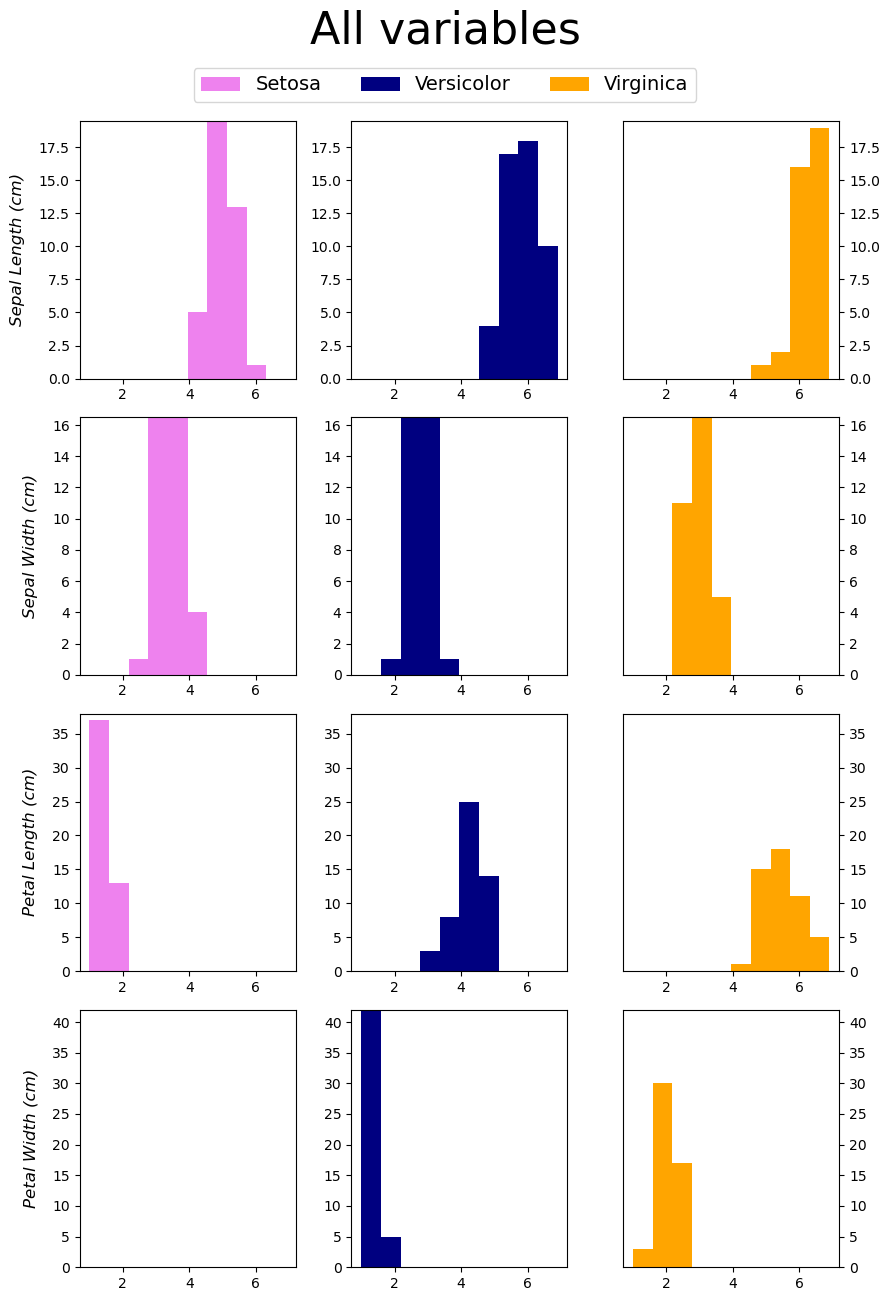

In [283]:
histogram_to_plot = 'sepal length (cm)'
histogram_to_plot = 'sepal width (cm)'
histogram_to_plot = 'petal length (cm)'
histogram_to_plot = 'petal width (cm)'

# Additional plot of histograms looking at individual species alone

# Setting variables for comparison across the species which will be used for the subplots
# sepal length vs sepal width, sepal length vs petal length, sepal length vs petal width
# sepal width vs petal length, sepal width vs petal width
# petal length vs petal width
# petal width
plt.figure(figsize=(9, 12))
plt.subplots_adjust(top=1)

ymin = 0
ymax = 19.5
set_bins_width(histogram_to_plot='sepal length (cm)')
plt.subplot(4, 3, 1)  # Creating a subplot for sepal length vs sepal width
setting_axis_limits(ymin, ymax)
plt.hist(setosa_sepal_length, bins=bin_edges, color='violet')
plt.ylabel('Sepal Length (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 2)  # Creating a subplot for sepal length vs petal length
setting_axis_limits(ymin, ymax)

plt.hist(versicolor_sepal_length, bins=bin_edges, color='navy')

plt.subplot(4, 3, 3)  # Creating a subplot for sepal length vs petal width
setting_axis_limits(ymin, ymax)

plt.hist(virginica_sepal_length, bins=bin_edges, color='orange')
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

ymax = 16.5

set_bins_width(histogram_to_plot='sepal width (cm)')


plt.subplot(4, 3, 4) # Creating plot for sepal width vs petal length
setting_axis_limits(ymin, ymax)
plt.hist(setosa_sepal_width, bins=bin_edges, color='violet', label='Setosa')
plt.ylabel('Sepal Width (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 5) # Creating plot for sepal width vs petal width
setting_axis_limits(ymin, ymax)
plt.hist(versicolor_sepal_width, bins=bin_edges, color='navy', label='Versicolor')

plt.subplot(4, 3, 6) # Creating plot for petal length vs petal width
setting_axis_limits(ymin, ymax)
plt.hist(virginica_sepal_width, bins=bin_edges, color='orange', label='Virginica')
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)


ymax = 38
set_bins_width(histogram_to_plot='petal length (cm)')
# Compute the bin edges based on the overall range of petal widths

plt.subplot(4, 3, 7) 
setting_axis_limits(ymin, ymax)
plt.hist(setosa_petal_length, bins=bin_edges, color='violet')
plt.ylabel('Petal Length (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 8)
setting_axis_limits(ymin, ymax)
plt.hist(versicolor_petal_length, bins=bin_edges, color='navy')

plt.subplot(4, 3, 9)
setting_axis_limits(ymin, ymax)
plt.hist(virginica_petal_length, bins=bin_edges, color='orange')
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

ymax = 42

set_bins_width(histogram_to_plot='petal width (cm)')
plt.subplot(4, 3, 10)
setting_axis_limits(ymin, ymax)
plt.hist(setosa_petal_width, bins=bin_edges, color='violet')
plt.ylabel('Petal Width (cm)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(4, 3, 11)
setting_axis_limits(ymin, ymax)
plt.hist(versicolor_petal_width, bins=bin_edges, color='navy')

plt.subplot(4, 3, 12)
setting_axis_limits(ymin, ymax)
plt.hist(virginica_petal_width, bins=bin_edges, color='orange',)
# Adjusting ticks on y-axis
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

plt.tight_layout()
plt.suptitle('All variables', y=1.08, fontsize=32)
plt.figlegend(loc = "upper center", ncols = 3, bbox_to_anchor=(0.5, 1.04), fontsize=14) # creating one legend for the subplots and setting it's location to the top center for the plot
#plt.savefig("5_all_variables_scatter.png", bbox_inches='tight') # saving scatter plot as PNG file with bbox_inches set to tight to adjust the title
plt.show()




### Analysis of findings from analysis.py
***

### Additional resources/reading:
***
Adding screenshots to Jupyter notebook
https://medium.com/@yogeshkd/four-ways-to-embed-images-in-your-jupyter-notebook-powered-blog-2d28f6d1b6e6#:~:text=1.,command%20to%20embed%20the%20screenshot.

#### Next actions/To-do list:
- Create all code needed in this notebook first to enable easy checking of batches of code
- Add extra analysis and commentary to accompany the plots in notebook
- Decide if README will be a jupyter notebook or just .md file (Does readme file just get deleted if using Jupyter notebook?)

### python file:
- Update python file after piece of code is validated
    - Add code which outputs a summary of each variable to single text file
    - ~~Add code to create histograms of each variables to png files~~
    - ~~Add code to create s scatter plot of each pair of variables~~

- ~~Create subplot which shows all variables against each other~~

- Create histogram of each variable:
    - ~~Write code first which generates the histograms for each variable~~
    - Point to consider: Would it be interesting to created stacked histogram of the variables showing variables for the different species
    - Point to consider: Addition file showing subplot that would have 4 rows, 3 columns in each and show the individual histograms per class
                                                                    OR
                         Addition plots which have all species but transparent so you can see the overlap but also individual distribution per plots? (Would this look confusing/messy?)
    - Refactor code to make the final histogram plots neater.
    
    - ~~Enhance so that histograms are saved to seperate png files~~

- Additional calculations: 
    - Point to consider: Would it be interesting to include the calculations of correlation, standard deviation?
    - Brainstorm any other insightful calculations that could be included

- ~~Point to consider: Would it be a good idea to include error handling to first see if the file is already created and if so displaying a message to the user like "Filenames already existing in folder, no new files generated."~~

- Spellcheck

### README.md sections:

- Research & summary of dataset
- How to run code
    - Cloning & Pulling GitHub
    - Running on your machine
- Explanation of what code does
- Analysis of own findings (including comparison to findings of published studies or analysis online from others)
- Footnotes & additional reading section
- Spellcheck

***
## End